# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 56.4MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install --upgrade statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv('/content/Traffic Data.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [11]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear
2018-02-12 15:00:00,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds
2018-05-31 18:00:00,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds


In [5]:
df.shape

(20000, 8)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [92]:
#to  making the ploting clear i take a part of a data
df_part = df.iloc[:1000]
df_part.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_rolling_3,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,NaN,NaN,NaN,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,NaN,4872.0,202.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4758.0,5074.0,-746.0,4,11,323
2016-11-18 18:00:00,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,4296.0,4328.0,-842.0,4,11,323
2016-11-18 19:00:00,2524.0,273.58,0.0,0.0,90,Mist,mist,3446.0,3486.0,-962.0,4,11,323


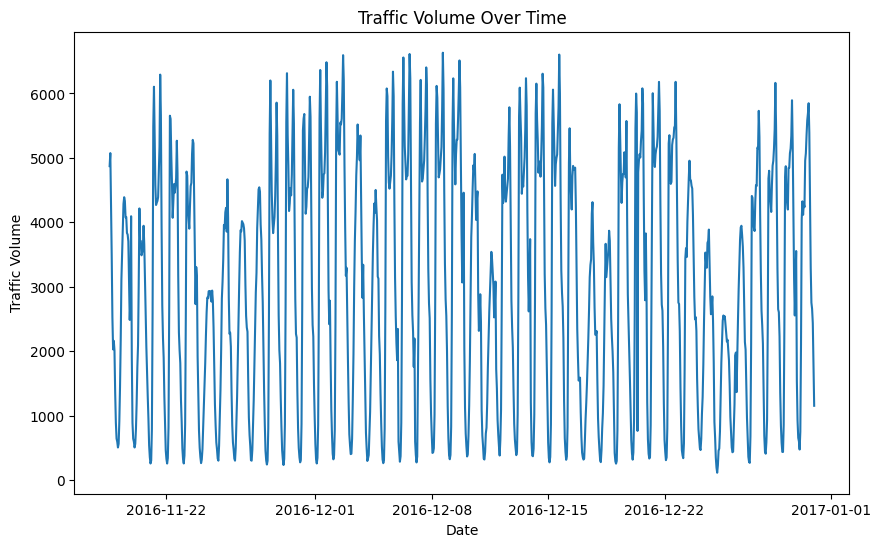

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(df_part.index, df_part['traffic_volume'])
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.show()

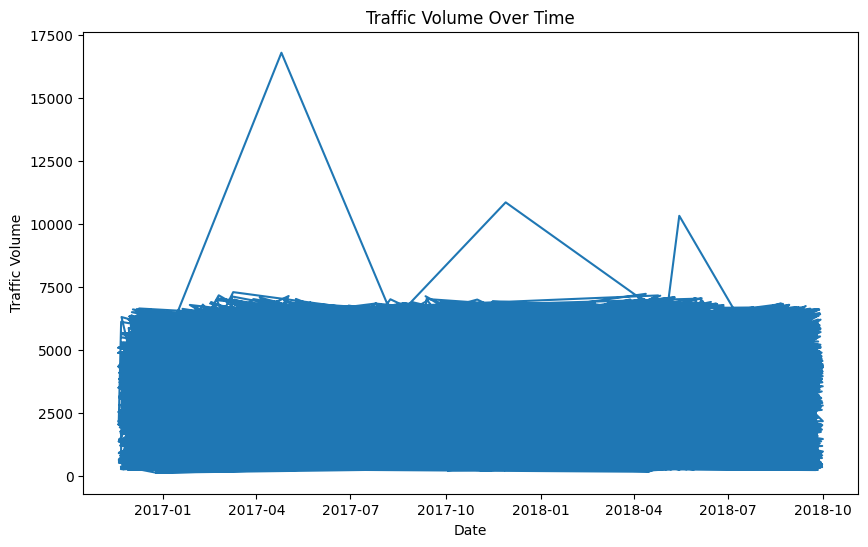

In [15]:
plt.figure(figsize=(10, 6))#with all the df
plt.plot(df.index, df['traffic_volume'])
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.show()

In [16]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


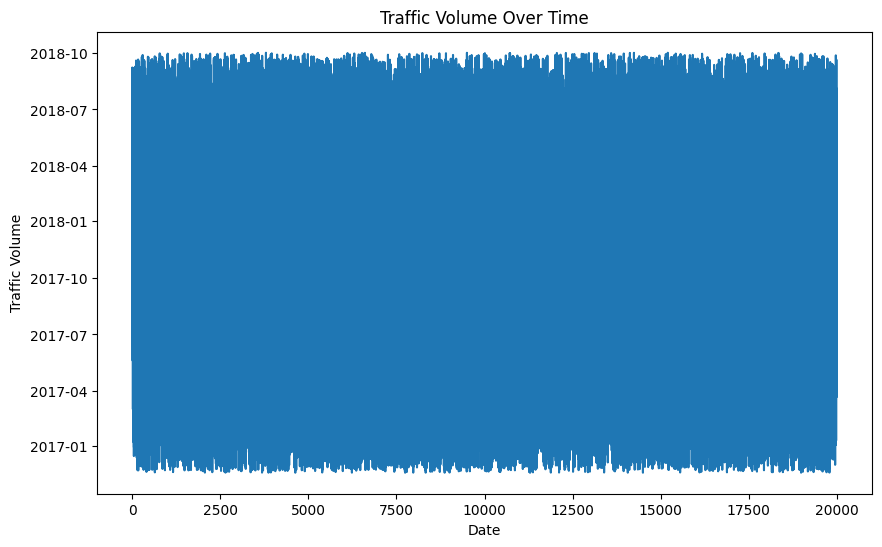

In [18]:
plt.figure(figsize=(10, 6))#all df
plt.plot(df.index)
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.show()

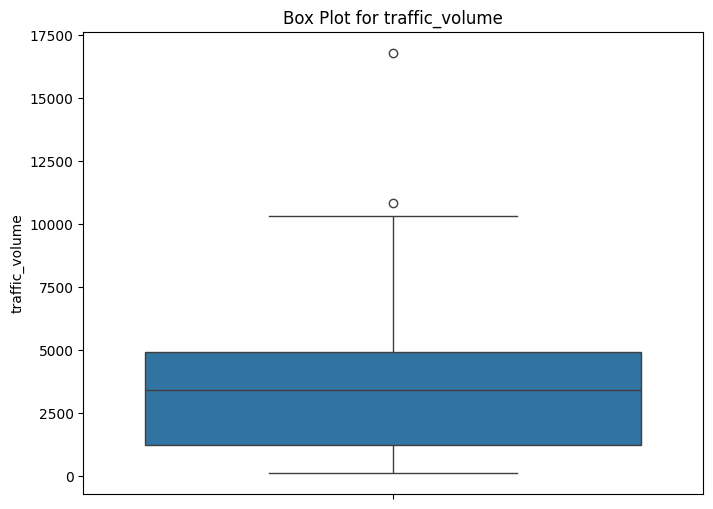

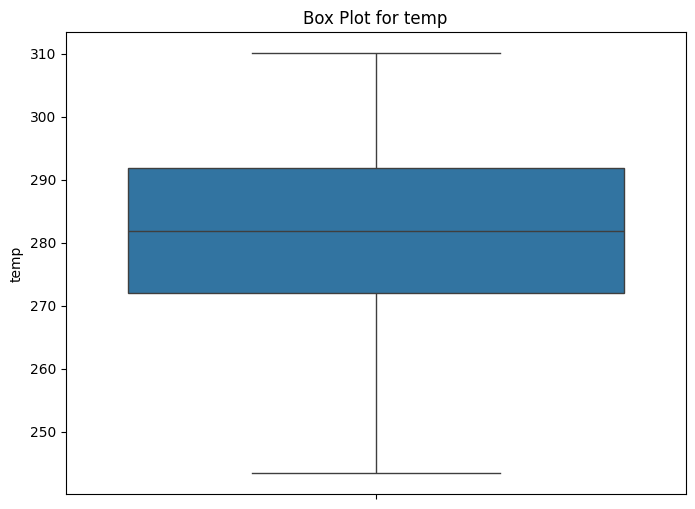

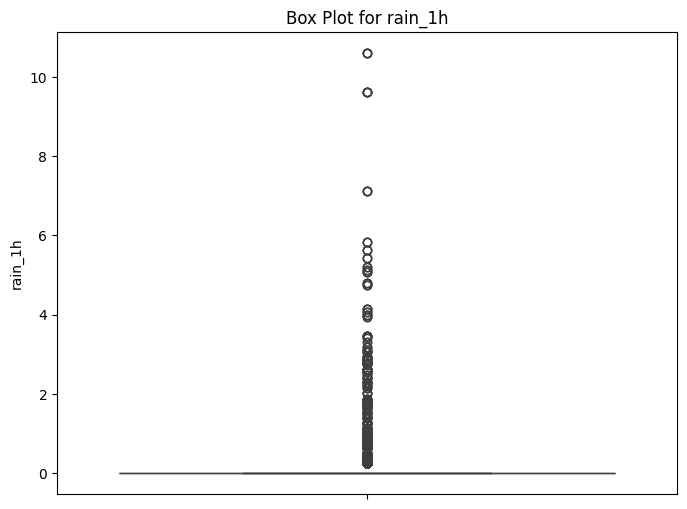

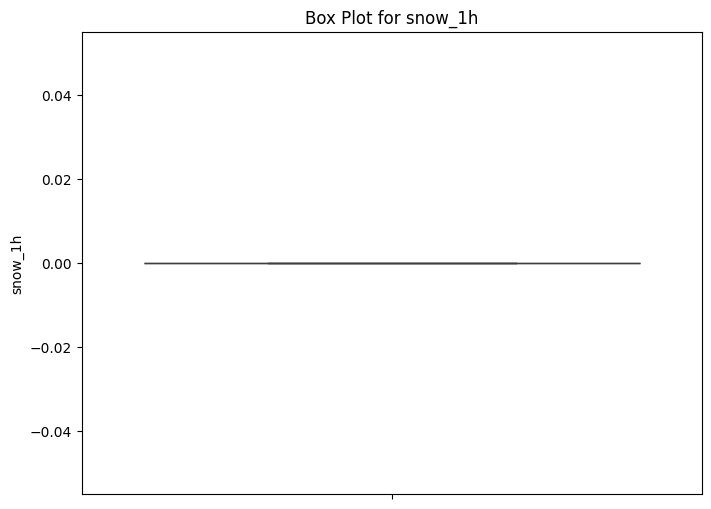

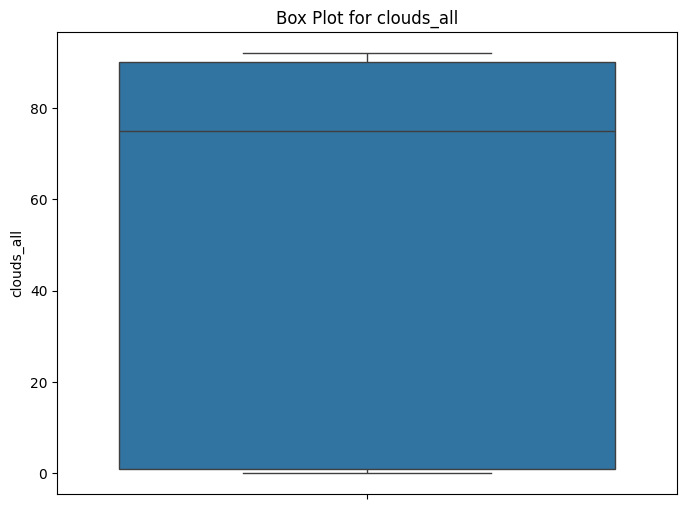

In [19]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [20]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [22]:
df['traffic_volume'].fillna(method='ffill', inplace=True)

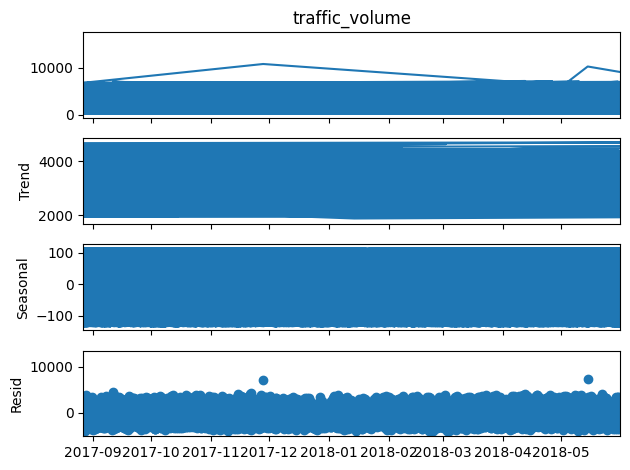

In [23]:
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)#all df
result.plot()
plt.show()

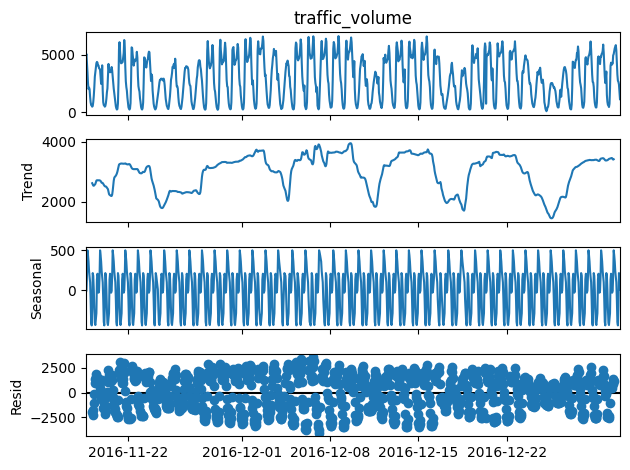

In [66]:
result = seasonal_decompose(df_part['traffic_volume'], model='additive', period=24)
result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
#for the  missing values i have handel it up

In [34]:
df= df[~df.index.duplicated(keep='first')]

In [32]:
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16269 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       16269 non-null  float64
 1   temp                 16269 non-null  float64
 2   rain_1h              16269 non-null  float64
 3   snow_1h              16269 non-null  float64
 4   clouds_all           16269 non-null  int64  
 5   weather_main         16269 non-null  object 
 6   weather_description  16269 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1016.8+ KB


In [29]:
df_daily = df.resample('D').sum()
df_hourly = df.resample('H').ffill()

In [35]:
df['traffic_volume_rolling_3'] = (df['traffic_volume'].rolling(window=3).mean())

In [36]:
df.sort_index(inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [37]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [38]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [39]:
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [40]:
x = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [42]:
non_numeric_cols = x_train.select_dtypes(exclude=['number']).columns

In [43]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
x_train_encoded = pd.DataFrame(encoder.fit_transform(x_train[non_numeric_cols]))
x_test_encoded = pd.DataFrame(encoder.transform(x_test[non_numeric_cols]))

In [44]:
x_train_encoded.columns = encoder.get_feature_names_out(non_numeric_cols)
x_test_encoded.columns = encoder.get_feature_names_out(non_numeric_cols)

x_train = x_train.drop(non_numeric_cols, axis=1).join(x_train_encoded)
x_test = x_test.drop(non_numeric_cols, axis=1).join(x_test_encoded)

In [45]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [47]:
 from statsmodels.tsa.statespace.sarimax import SARIMAX
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)
model1 = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
model1_fit = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [93]:
model2 = Sequential()
model2.add(GRU(64, input_shape=(x_train_reshaped.shape[1], x_train_reshaped.shape[2])))
model2.add(Dense(1))

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [49]:
model1_fit = model1.fit()

In [50]:
print(model1_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     traffic_volume   No. Observations:                13015
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -101639.133
Date:                            Sun, 25 Aug 2024   AIC                         203288.267
Time:                                    07:51:53   BIC                         203325.626
Sample:                                         0   HQIC                        203300.750
                                          - 13015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0119      0.024      0.503      0.615      -0.035       0.058
ma.L1          0.2117      0.023   

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [51]:
predictions = model1_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [52]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mape = mean_absolute_percentage_error(y_test, predictions)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 1968.7893175939405
MSE: 6020696.835315791
RMSE: 2453.710829603968
MAPE: 1.5481351871868212


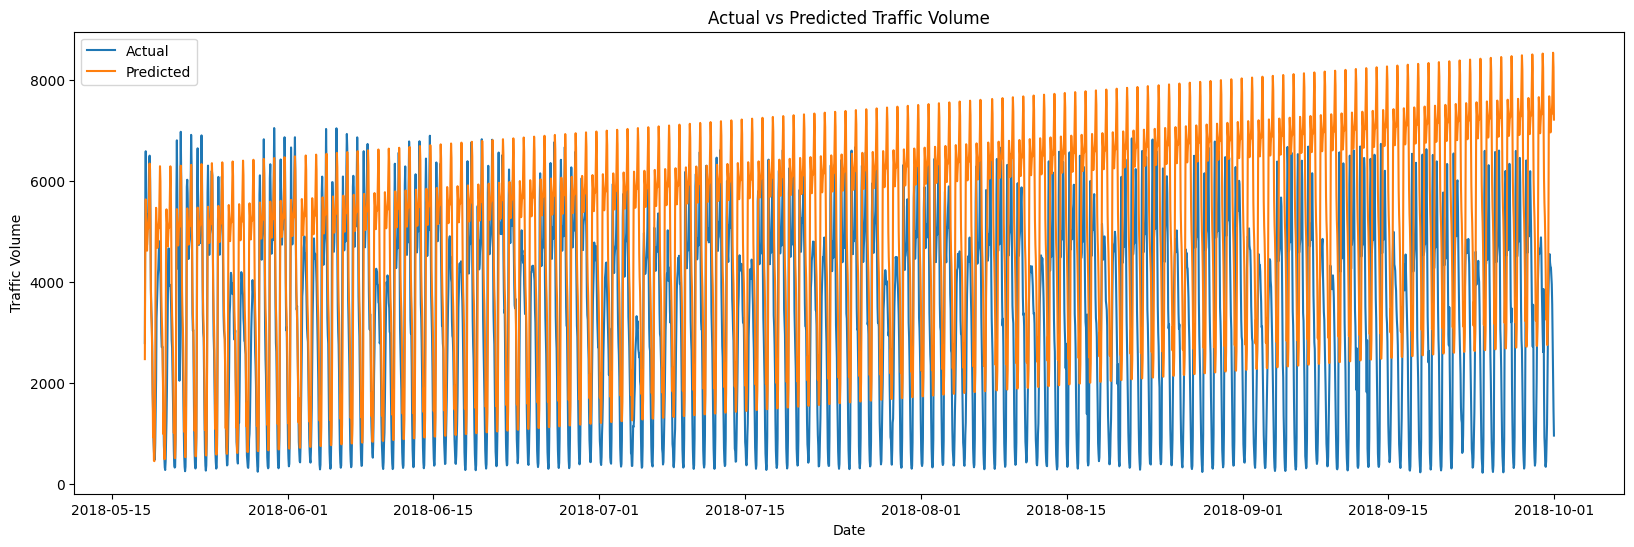

In [57]:
plt.figure(figsize=(20, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train_scaled = imputer.fit_transform(x_train_scaled)

In [96]:
print(np.isnan(x_test_reshaped).any())
print(np.isinf(x_test_reshaped).any())

True
False


In [84]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='mse')
model2.fit(x_train_reshaped, y_train, epochs=10, batch_size=64, validation_data=(x_test_reshaped, y_test))

Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: nan - val_loss: nan
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: nan - val_loss: nan
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: nan - val_loss: nan
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: nan - val_loss: nan
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: nan - val_loss: nan
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: nan - val_loss: nan
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: nan - val_loss: nan
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: nan - val_loss: nan
Epoch 9/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: nan - val_loss: nan
Epoch 10/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: nan - val_loss: nan


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [90]:
predictions2 = model2.predict(x_test_reshaped)
if np.any(np.isnan(predictions2)):
    print("Warning: NaN values found in predictions.")

    predictions2 = np.nan_to_num(predictions2, nan=0.0)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [91]:
mae = mean_absolute_error(y_test, predictions2)
mse = mean_squared_error(y_test, predictions2)
rmse = mean_squared_error(y_test, predictions2, squared=False)
mape = mean_absolute_percentage_error(y_test, predictions2)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 3344.3958205285803
MSE: 14937566.637984019
RMSE: 3864.914829331174
MAPE: 1.0


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

 1- In order to expedite the process and promptly detect problems before implementing fixes to the entire dataset, I worked with a subset of the data.and i make a part of the df to use it in the ploting
 2- To assist the model in identifying temporal trends, I created a prev_traffic_volume column using the Shift method and extracted important time-based features from date_time.
 3- Bause SARMA and GRU,

 Note on the Second Model: Despite cleaning and modifying the data, I ran across a problem with NaN values. The accuracy of the model was impacted because I was unable to determine the cause. To make sure no errors were introduced, this can call for a more thorough inspection of the data or a review of the preprocessing procedures.